In [2]:
%matplotlib inline
from random import shuffle
import pandas as pd
import numpy as np
import os

import copy
import imagesize

In [57]:
def exctraction_info(name, test=False):
    names = []
    bbx = []
    temp = []
    
    file_train = open(name, 'r')
    lines = file_train.readlines()
    
    for i in range(len(lines)):
        lines[i]=lines[i][:-1]
        
        if lines[i][-4:]=='.jpg':
            temp[:] = []
            #name =  "WIDER_train/images/"
            names.append(lines[i])
            if not test:
                i+=1
                faces = int(lines[i])
                m=i

                for n in range(1,faces+1):
                    ints = [int(i) for i in lines[i+n][:-1].split()]
                    temp.append(ints)

                bbx.append(copy.deepcopy(temp))
    return names, bbx

names_train, bbx_train = exctraction_info('../data/WIDERface/wider_face_split/wider_face_train_bbx_gt.txt')
#names_val, bbx_val = exctraction_info('../data/WIDERface/wider_face_split/wider_face_val_bbx_gt.txt')
#names_train, bbx_train = exctraction_info('../data/WIDERface/wider_face_split/wider_face_test_filelist.txt', True)
transformation = []
names = []
clas = []
length =[]

for i in range(len(bbx_train)):
    transformation.append(bbx_train[i])
    names.append(os.path.join("../data/WIDERface/WIDER_train/images/",names_train[i]))
    length.append(len(bbx_train[i]))
    clas.append("head")

df = pd.DataFrame(list(zip(names,clas,np.asarray(transformation),length)),
              columns =['filename','class','box','len'])

C:\Users\Baptiste\Anaconda\envs\tf\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [58]:
df

,filename,class,box,len
0,../data/WIDERface/WIDER_train/images/0--Parade...,head,"[[449, 330, 122, 149, 0, 0, 0, 0, 0, 0]]",1
1,../data/WIDERface/WIDER_train/images/0--Parade...,head,"[[361, 98, 263, 339, 0, 0, 0, 0, 0, 0]]",1
2,../data/WIDERface/WIDER_train/images/0--Parade...,head,"[[78, 221, 7, 8, 2, 0, 0, 0, 0, 0], [78, 238, ...",21
3,../data/WIDERface/WIDER_train/images/0--Parade...,head,"[[69, 359, 50, 36, 1, 0, 0, 0, 0, 1], [227, 38...",9
4,../data/WIDERface/WIDER_train/images/0--Parade...,head,"[[27, 226, 33, 36, 1, 0, 0, 0, 2, 0], [63, 95,...",35
...,...,...,...,...
12875,../data/WIDERface/WIDER_train/images/9--Press_...,head,"[[462, 140, 264, 362, 0, 0, 0, 0, 0, 0]]",1
12876,../data/WIDERface/WIDER_train/images/9--Press_...,head,"[[362, 108, 214, 277, 0, 0, 0, 0, 0, 0]]",1
12877,../data/WIDERface/WIDER_train/images/9--Press_...,head,"[[495, 222, 165, 222, 0, 0, 0, 0, 0, 0]]",1
12878,../data/WIDERface/WIDER_train/images/9--Press_...,head,"[[244, 46, 510, 614, 0, 0, 0, 0, 0, 0]]",1


In [59]:
df.iloc[3125]

filename    ../data/WIDERface/WIDER_train/images/2--Demons...
class                                                    head
box         [[133, 24, 3, 3, 2, 0, 0, 0, 2, 0], [128, 20, ...
len                                                      1968
Name: 3125, dtype: object

In [63]:
from statistics import mean

print("Min nbr of faces in the images :",min(length),np.argmin(length))

print("Max nbr of faces in the images :",max(length),np.argmax(length))

print("Mean nbr of faces in the images :",mean(length))

Min nbr of faces in the images : 0 279
Max nbr of faces in the images : 1968 3125
Mean nbr of faces in the images : 12.377329192546584


In [64]:
#Getting number of images with more than 100 faces
n=0
for i in length:
    if i>100:
        n+=1
print("Nbr of images with more than 100 faces :",n)

#98th percentile so it's ok to exclude them
242/12880

Nbr of images with more than 100 faces : 242


0.018788819875776398

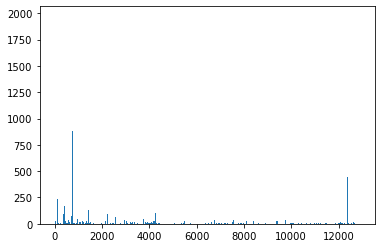

In [65]:
from matplotlib import pyplot as plt

x = list(range(len(length)))
plt.bar(x, length)
plt.show()

In [74]:
#Average size of faces in the images

size=[]
j=0
for boxes in df["box"]:
    for box in boxes:
        size.append(box[2]*box[3])
        
        
print("Mean size of the faces in the training set :", mean(size))

Mean size of the faces in the training set : 3851.3273365951572


## Training plotting

In [1]:
f = open("../training_transfo_learn_best.txt", "r")

import re

val = []
epoch = []

for x in f:
    line = re.split('\[|\]',x)
    
    if line[0]=='Validation step: ':
        scores = [int(line[1]),float(line[3]), float(line[5]), float(line[7])]
        val.append(scores)
    elif line[0]=='Epoch: ':
        scores = [int(line[1]),float(line[5]), float(line[7]), float(line[9])]
        epoch.append(scores)

val_mean=[]
ce=0
gio=0
l1=0
j=0
for i in range(len(val)):
    ce +=val[i][1]
    gio +=val[i][2]
    l1 +=val[i][3]
    j+=1
    if val[i][0]==190:
        val_mean.append([ce/j,gio/j,l1/j])
        ce=0
        gio=0
        l1=0
        j=0

epoch_mean=[]
ce=0
gio=0
l1=0
j=0
init=0

for i in range(len(epoch)):
    if epoch[i][0]!=init:
        epoch_mean.append([ce/j,gio/j,l1/j])
        ce=0
        gio=0
        l1=0
        j=0
        init=epoch[i][0]
    ce +=epoch[i][1]
    gio +=epoch[i][2]
    l1 +=epoch[i][3]
    j+=1
epoch_mean.append([ce/j,gio/j,l1/j])

<Figure size 720x288 with 0 Axes>

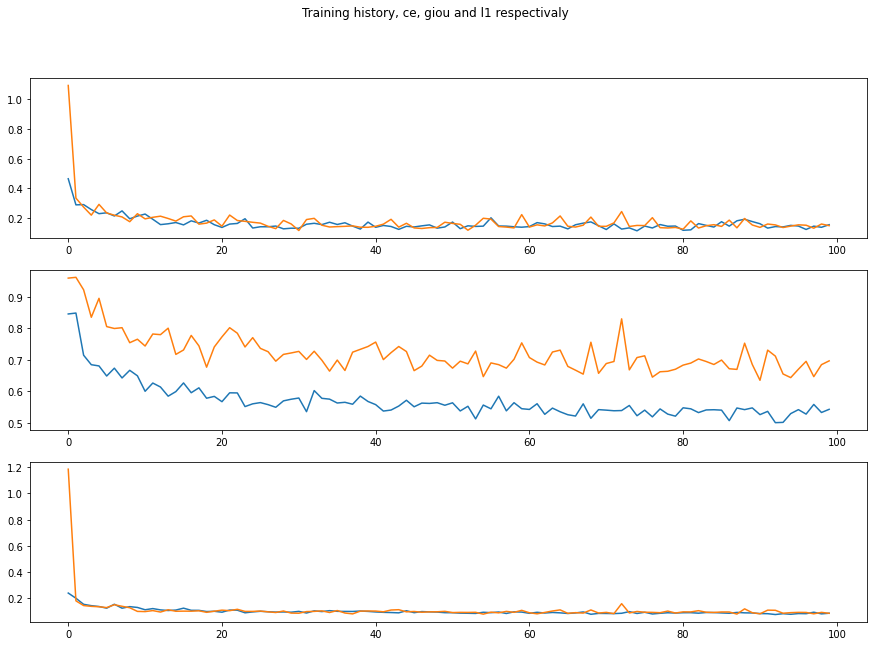

In [3]:
from matplotlib import pyplot as plt
import numpy as np

fig = plt.figure(constrained_layout=True, figsize=(10, 4))

fig, (ax1, ax2, ax3) = plt.subplots(3,figsize=(15, 10))
fig.suptitle('Training history, ce, giou and l1 respectivaly')

ax1.plot(range(len(np.asarray(epoch_mean)[:,1])), np.asarray(epoch_mean)[:,0])
ax1.plot(range(100), np.asarray(val_mean)[:,0])

ax2.plot(range(len(np.asarray(epoch_mean)[:,1])), np.asarray(epoch_mean)[:,1])
ax2.plot(range(100), np.asarray(val_mean)[:,1])

ax3.plot(range(len(np.asarray(epoch_mean)[:,1])), np.asarray(epoch_mean)[:,2])
ax3.plot(range(100), np.asarray(val_mean)[:,2])

plt.savefig('training_hist_transfo.png')